In [112]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.ensemble import IsolationForest
import matplotlib
from matplotlib import pyplot as plt

In [113]:
beers_data = pd.read_excel("datasets/beers.xlsx")

In [114]:
beers_data.describe()

,ABV,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
count,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000
mean,6.526688,21.180482,38.986863,16.515796,46.129496,17.055990,36.364404,58.270879,33.145449,1.017204,38.529559,40.924617,75.330935,3.638915,3.754598,3.660594,3.702671,3.747695,233.284955
std,2.546997,13.242242,21.355281,10.410661,25.947842,17.331334,25.791152,34.281310,35.780172,2.132651,32.296646,30.403641,39.909338,0.503225,0.403493,0.449916,0.510404,0.444272,361.811847
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.510000,1.570000,1.290000,1.210000,1.140000,1.000000
25%,5.000000,15.000000,25.000000,9.000000,29.000000,6.000000,17.000000,33.000000,11.000000,0.000000,12.000000,18.000000,45.000000,3.420000,3.600000,3.470000,3.500000,3.570000,23.000000
50%,6.000000,20.000000,35.000000,14.000000,40.000000,11.000000,31.000000,54.000000,22.000000,0.000000,29.000000,33.000000,73.000000,3.720000,3.830000,3.740000,3.790000,3.830000,93.000000
75%,7.600000,25.000000,45.000000,21.000000,58.000000,22.000000,52.000000,77.000000,42.000000,1.000000,60.000000,56.000000,103.000000,3.980000,4.000000,3.970000,4.030000,4.030000,284.000000
max,57.500000,65.000000,100.000000,81.000000,175.000000,139.000000,150.000000,263.000000,284.000000,48.000000,175.000000,172.000000,239.000000,5.000000,4.670000,5.000000,5.000000,5.000000,3290.000000


In [115]:
beers_data.drop(columns = ['Description'] , inplace=True)

In [116]:
beers_data.drop(columns = ['Beer Name (Full)'] , inplace=True)

In [117]:
beers_data[['Name', 'Brewery', 'Style']].drop_duplicates()
beers_data.set_index(['Name', 'Brewery', 'Style'], inplace=True)

In [118]:
beers_data = beers_data[['Body', 'Alcohol', 'Fruits', 'Hoppy', 'review_aroma']]

In [119]:
beers_data.head()

,,,Body,Alcohol,Fruits,Hoppy,review_aroma
Name,Brewery,Style,,,,,
Pumking - Rum Barrel Aged,Southern Tier Brewing Company,Pumpkin Beer,36,139,60,12,4.18
Sustenance Black Beer - Bourbon Barrel-Aged,Short's Brewing Company,Lager - Schwarzbier,98,126,17,18,3.96
Wee Heavy - Barrel-Aged,AleSmith Brewing Company,Scotch Ale / Wee Heavy,80,123,30,11,4.43
Golden Delicious,Captain Lawrence Brewing Co.,Tripel,45,120,148,60,4.01
Barrel Aged Brrrbon (Brothers' Reserve Series),Widmer Brothers Brewing Company,Winter Warmer,59,118,27,47,3.60


In [120]:
beers_data.corr()

,Body,Alcohol,Fruits,Hoppy,review_aroma
Body,1.000000,0.268885,-0.048155,0.070138,0.360177
Alcohol,0.268885,1.000000,0.254299,-0.079949,0.242967
Fruits,-0.048155,0.254299,1.000000,0.110407,0.386653
Hoppy,0.070138,-0.079949,0.110407,1.000000,0.099705
review_aroma,0.360177,0.242967,0.386653,0.099705,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025BCEB59A60>,
      dtype=object)

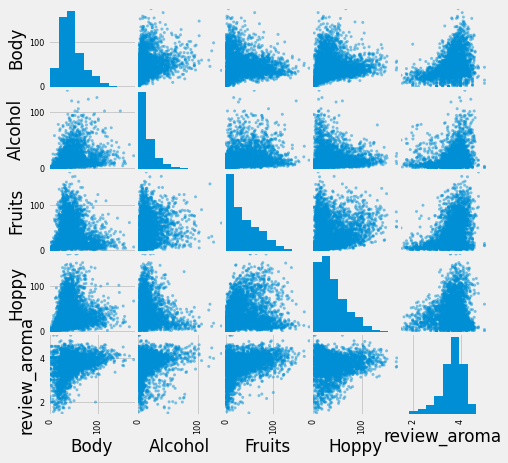

In [121]:
scatter_matrix(beers_data, figsize=(7,7))

In [122]:
clf = IsolationForest(random_state=0)
beer_data_iso = beers_data[beers_data.columns].to_numpy().astype(float)
clf.fit(beer_data_iso)
beers_data['outlier'] = clf.predict(beer_data_iso)
beers_data[beers_data['outlier'] == -1]

,,,Body,Alcohol,Fruits,Hoppy,review_aroma,outlier
Name,Brewery,Style,,,,,,
Pumking - Rum Barrel Aged,Southern Tier Brewing Company,Pumpkin Beer,36,139,60,12,4.18,-1
Sustenance Black Beer - Bourbon Barrel-Aged,Short's Brewing Company,Lager - Schwarzbier,98,126,17,18,3.96,-1
Wee Heavy - Barrel-Aged,AleSmith Brewing Company,Scotch Ale / Wee Heavy,80,123,30,11,4.43,-1
Golden Delicious,Captain Lawrence Brewing Co.,Tripel,45,120,148,60,4.01,-1
Barrel Aged Brrrbon (Brothers' Reserve Series),Widmer Brothers Brewing Company,Winter Warmer,59,118,27,47,3.60,-1
...,...,...,...,...,...,...,...,...
Roggenschnizzle,The Bier Brewery,Rye Beer - Roggenbier,4,0,0,0,4.25,-1
Orkiszowe,Browar Kormoran,Rye Beer - Roggenbier,0,0,0,0,3.00,-1
Smoaktoberfest,Live Oak Brewing Company,Smoked Beer,1,0,0,3,3.84,-1


In [123]:
clf.__dict__

{'base_estimator': ExtraTreeRegressor(max_depth=8, max_features=1, random_state=0),
 'n_estimators': 100,
 'estimator_params': (),
 'max_samples': 'auto',
 'max_features': 1.0,
 'bootstrap': False,
 'bootstrap_features': False,
 'oob_score': False,
 'warm_start': False,
 'n_jobs': None,
 'random_state': 0,
 'verbose': 0,
 'behaviour': 'deprecated',
 'contamination': 'auto',
 'max_samples_': 256,
 'n_features_in_': 5,
 'n_features_': 5,
 '_n_samples': 3197,
 'base_estimator_': ExtraTreeRegressor(max_depth=8, max_features=1, random_state=0),
 '_max_samples': 256,
 '_max_features': 5,
 'estimators_': [ExtraTreeRegressor(max_depth=8, max_features=1, random_state=2087557356),
  ExtraTreeRegressor(max_depth=8, max_features=1, random_state=132990059),
  ExtraTreeRegressor(max_depth=8, max_features=1, random_state=1109697837),
  ExtraTreeRegressor(max_depth=8, max_features=1, random_state=123230084),
  ExtraTreeRegressor(max_depth=8, max_features=1, random_state=633163265),
  ExtraTreeRegresso

In [124]:
beers_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3197 entries, ('Pumking - Rum Barrel Aged', 'Southern Tier Brewing Company', 'Pumpkin Beer') to ('Samuel Adams White AleBoston Beer Company (Samuel Adams)', 'Boston Beer Company (Samuel Adams)', 'Wheat Beer - Witbier')
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Body          3197 non-null   int64  
 1   Alcohol       3197 non-null   int64  
 2   Fruits        3197 non-null   int64  
 3   Hoppy         3197 non-null   int64  
 4   review_aroma  3197 non-null   float64
 5   outlier       3197 non-null   int32  
dtypes: float64(1), int32(1), int64(4)
memory usage: 185.3+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025BCF170F10>,
      dtype=object)

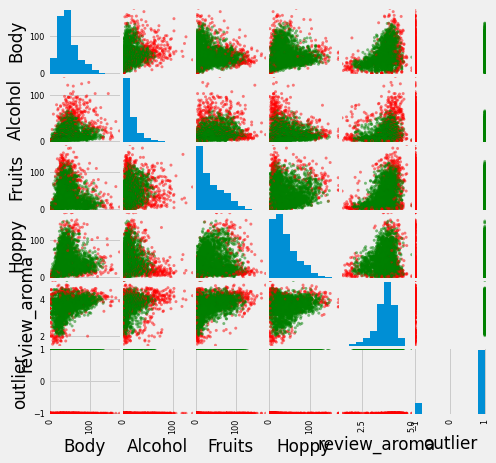

In [125]:
colors=['Red', 'Green']
scatter_matrix(beers_data, figsize=(7,7), c=beers_data['outlier'], cmap=matplotlib.colors.ListedColormap(colors))

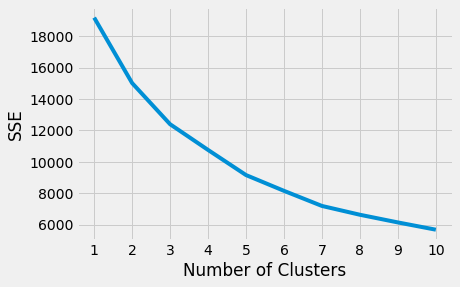

5

In [126]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

scaler = StandardScaler()
#scaler = Normalizer()
scaled_features = scaler.fit_transform(beers_data)

kmeans_kwargs = {
    "init" : "random",
    "n_init" : 10,
    "max_iter" : 300,
    "random_state" : 42,
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)
kl.elbow

In [127]:
kmeans.__dict__

{'n_clusters': 10,
 'init': 'random',
 'max_iter': 300,
 'tol': 0.0001,
 'precompute_distances': 'deprecated',
 'n_init': 10,
 'verbose': 0,
 'random_state': 42,
 'copy_x': True,
 'n_jobs': 'deprecated',
 'algorithm': 'auto',
 '_n_threads': 4,
 'n_features_in_': 6,
 'cluster_centers_': array([[ 0.24426547,  0.39495405,  1.31039937,  2.47442717,  0.73819259,
         -2.37916302],
        [-1.03013697,  0.3235959 , -0.79387   , -0.78354346, -2.53036915,
         -2.37916302],
        [-0.47088171, -0.31853413,  2.45115179, -0.71026563,  0.92994258,
         -2.37916302],
        [ 1.49775283, -0.20337803, -0.66448712, -0.21483498,  0.35860148,
          0.42031588],
        [-0.80849561, -0.5368279 , -0.79484504, -0.31127562, -1.63270993,
          0.42031588],
        [ 0.71308541,  3.20276826,  0.56350165, -0.64057497,  0.87959913,
         -2.37916302],
        [ 2.84453657,  0.80468076, -0.39698919, -0.23875712,  0.92879041,
         -2.37916302],
        [-0.20038589, -0.25876573, 

In [128]:
import pandas as pd
import numpy as np

df_describe = pd.DataFrame(scaled_features)
df_describe.describe()

,0,1,2,3,4,5
count,3.197000e+03,3.197000e+03,3.197000e+03,3.197000e+03,3.197000e+03,3.197000e+03
mean,2.338171e-16,4.772188e-16,1.634948e-16,-1.194627e-15,2.490101e-16,1.032994e-14
std,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00
min,-1.778056e+00,-9.842669e-01,-1.193176e+00,-1.346254e+00,-4.231206e+00,-2.379163e+00
25%,-6.602544e-01,-6.380189e-01,-8.215624e-01,-7.541269e-01,-4.350915e-01,4.203159e-01
50%,-2.362607e-01,-3.494790e-01,-2.951096e-01,-2.606877e-01,1.611568e-01,4.203159e-01
75%,4.575471e-01,2.853089e-01,6.648926e-01,4.959189e-01,6.779053e-01,4.203159e-01
max,4.967298e+00,7.037143e+00,4.226191e+00,4.311848e+00,2.705149e+00,4.203159e-01


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025BD0A58100>,
      dtype=object)

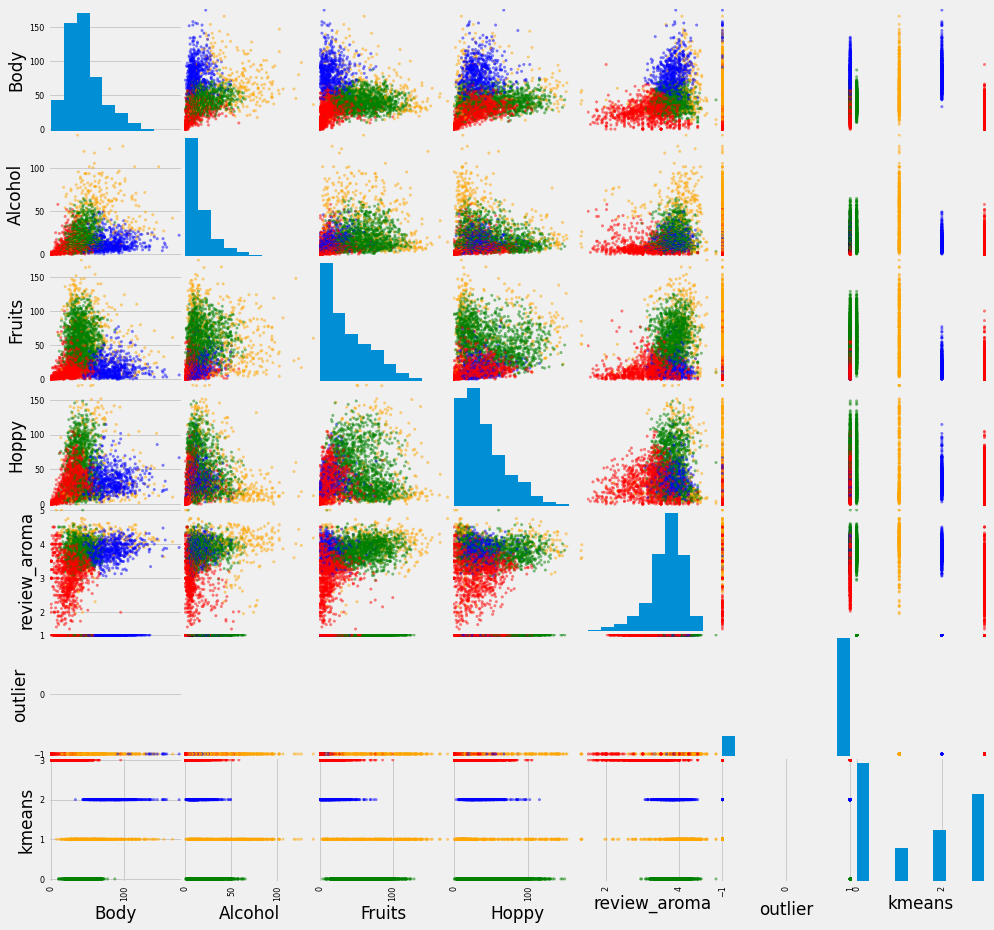

In [129]:
kmeans4 = KMeans(n_clusters=4, **kmeans_kwargs)
kmeans4.fit(scaled_features)
beers_data['kmeans'] = kmeans4.predict(scaled_features)

colors = {'Red', 'Orange', 'Green', 'Blue'}
scatter_matrix(beers_data, figsize=(15,15), c=beers_data['kmeans'], cmap=matplotlib.colors.ListedColormap(colors))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025BCF83E8B0>,
      dtype=object)

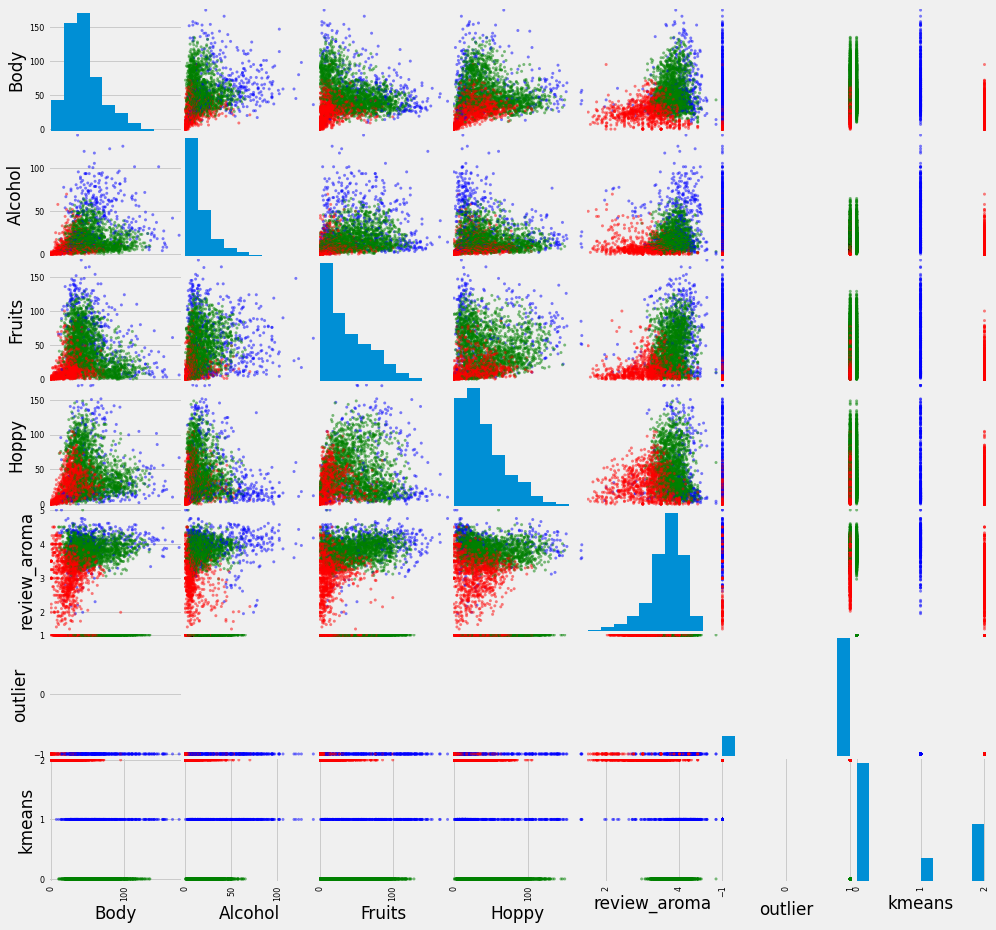

In [130]:
kmeans3 = KMeans(n_clusters=3, **kmeans_kwargs)
kmeans3.fit(scaled_features)
beers_data['kmeans'] = kmeans3.predict(scaled_features)

colors = {'Red', 'Orange', 'Green', 'Blue'}
scatter_matrix(beers_data, figsize=(15,15), c=beers_data['kmeans'], cmap=matplotlib.colors.ListedColormap(colors))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025BCE49C8E0>,
      dtype=object)

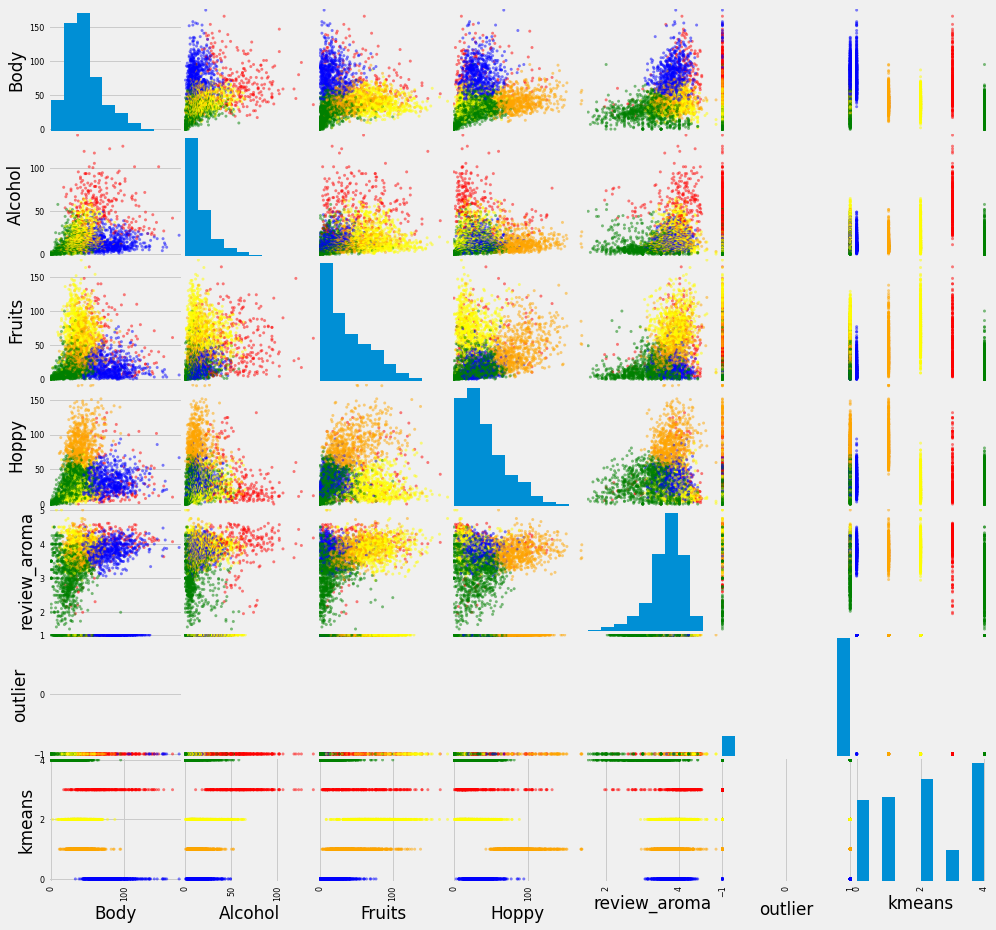

In [131]:
kmeans5 = KMeans(n_clusters=5, **kmeans_kwargs)
kmeans5.fit(scaled_features)
beers_data['kmeans'] = kmeans5.predict(scaled_features)

colors = {'Red', 'Orange', 'Green', 'Blue', 'Yellow'}
scatter_matrix(beers_data, figsize=(15,15), c=beers_data['kmeans'], cmap=matplotlib.colors.ListedColormap(colors))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025BD50F9AF0>,
      dtype=object)

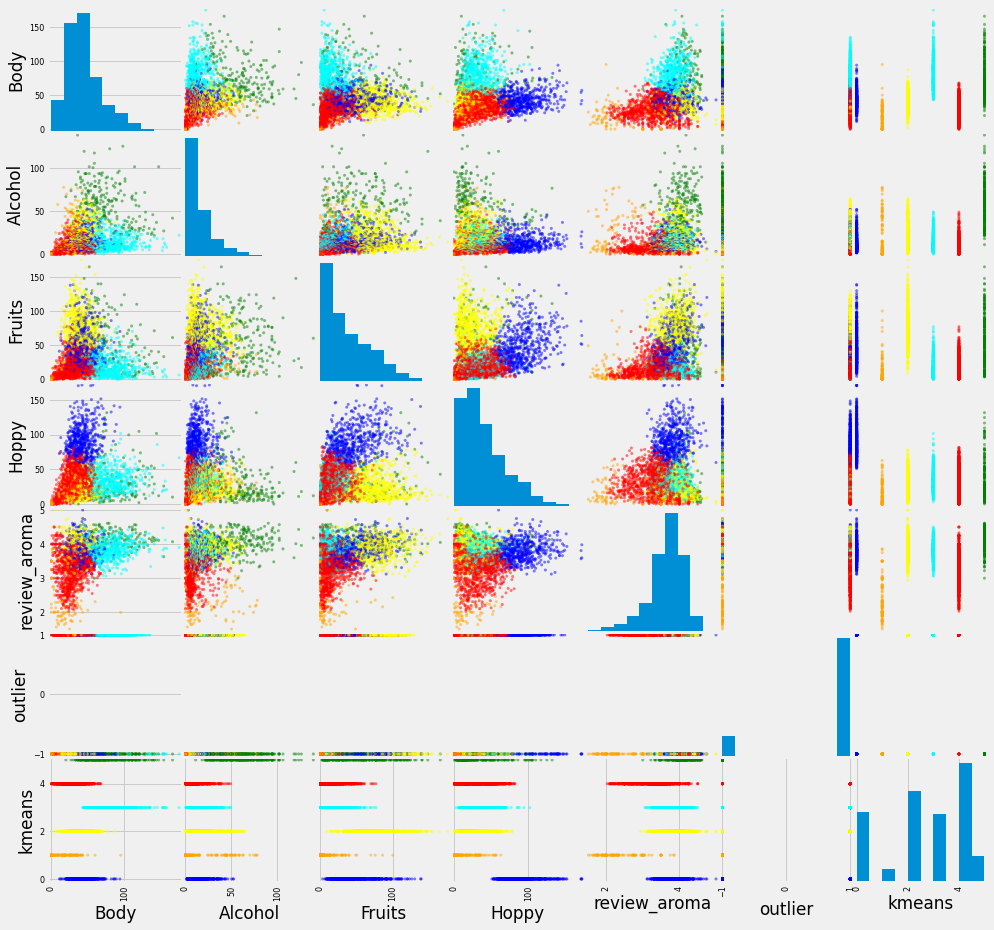

In [132]:
kmeans6 = KMeans(n_clusters=6, **kmeans_kwargs)
kmeans6.fit(scaled_features)
beers_data['kmeans'] = kmeans6.predict(scaled_features)

colors = {'Red', 'Orange', 'Green', 'Blue', 'Yellow', 'Cyan'}
scatter_matrix(beers_data, figsize=(15,15), c=beers_data['kmeans'], cmap=matplotlib.colors.ListedColormap(colors))

In [133]:
class_count = beers_data.groupby(['kmeans']).size()
class_count

kmeans
0    577
1    105
2    754
3    560
4    983
5    218
dtype: int64

In [134]:
style_clusters = beers_data.reset_index()[['Style', 'kmeans']]
style_clusters['count'] = 1
pd.pivot_table(style_clusters, index = ['Style'], columns = ['kmeans'], aggfunc=np.sum).to_excel('beer_style_clusters.xlsx')

In [167]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

X = beers_data[['Body', 'Alcohol', 'Fruits', 'Hoppy', 'review_aroma']]
y = beers_data[['kmeans']]
skf = StratifiedKFold(n_splits=20, random_state=0, shuffle=True)
kf = KFold(n_splits=20, random_state=0, shuffle=True)

from sklearn.neighbors import KNeighborsClassifier

scores_series_kf = []
scores_std_kf = []
k_series = list(range(1,31))
for k in k_series:
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X, y, scoring='f1_weighted', cv=kf, n_jobs=-1)
    scores_series_kf.append(scores.mean())
    scores_std_kf.append(scores.std())

    print(k, scores, scores.mean())



1 [0.84834403 0.892641   0.82623626 0.87332491 0.86284354 0.86628543
 0.89037826 0.91561996 0.85145951 0.85395121 0.89203637 0.7976278
 0.8873433  0.78812074 0.84120138 0.83881319 0.88446035 0.85409329
 0.912473   0.88039214] 0.8628822837046697
2 [0.85919271 0.86407468 0.7740995  0.84205846 0.87036108 0.8140748
 0.88291039 0.83914853 0.84258848 0.83859847 0.83867162 0.78453423
 0.82615665 0.79118536 0.82021977 0.82323055 0.85648904 0.83768514
 0.88325029 0.86714926] 0.837783949828738
3 [0.83759973 0.9044265  0.79829511 0.88546566 0.83485724 0.84196896
 0.92672627 0.88568433 0.871948   0.84785413 0.87091065 0.84688677
 0.86818017 0.83132928 0.85380905 0.85005986 0.89703869 0.87263737
 0.92967045 0.89938663] 0.8677367420076723
4 [0.84169048 0.91613797 0.83018048 0.84720081 0.84752348 0.86544016
 0.8982271  0.89271184 0.91149831 0.85672605 0.84270573 0.83151316
 0.89105376 0.81811603 0.86517251 0.89448476 0.88224576 0.8669053
 0.92479568 0.89965504] 0.8711992203319834
5 [0.85375013 0.9106

In [165]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

X = beers_data[['Body', 'Alcohol', 'Fruits', 'Hoppy', 'review_aroma']]
y = beers_data[['kmeans']]
skf = StratifiedKFold(n_splits=20, random_state=0, shuffle=True)
from sklearn.neighbors import KNeighborsClassifier

scores_series = []
scores_std = []
k_series = list(range(1,31))
for k in k_series:
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X, y, scoring='f1_weighted', cv=skf, n_jobs=-1)
    scores_series.append(scores.mean())
    scores_std.append(scores.std())

    print(k, scores, scores.mean())



1 [0.88615769 0.81055299 0.82503582 0.86912977 0.88728244 0.88172164
 0.88298656 0.85667607 0.83823307 0.83343392 0.8432514  0.81541109
 0.88279592 0.84990585 0.87150564 0.92523476 0.87089176 0.85669141
 0.90546373 0.81688755] 0.8604624543389379
2 [0.84621471 0.76415724 0.80763922 0.84278628 0.84116437 0.83013633
 0.86090325 0.83671267 0.85984188 0.81536883 0.82156208 0.80061383
 0.88742312 0.82124292 0.85476338 0.86630523 0.85121742 0.81650963
 0.86693148 0.83307531] 0.8362284591786964
3 [0.91060437 0.82474576 0.86203394 0.86711332 0.88034672 0.88197976
 0.86654001 0.84459207 0.88708066 0.8454704  0.8425751  0.86460753
 0.88053905 0.86329647 0.8851496  0.89842602 0.86118323 0.85589406
 0.89771315 0.8483096 ] 0.8684100420141126
4 [0.89982556 0.83688789 0.84264968 0.89049897 0.88662852 0.8880573
 0.87181009 0.84372948 0.90106941 0.8464327  0.82960452 0.86369724
 0.91294793 0.85514908 0.89781336 0.87512525 0.88686129 0.85389202
 0.89263969 0.8657138 ] 0.8720516886272882
5 [0.88643278 0.8

In [174]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

X = beers_data[['Body', 'Alcohol', 'Fruits', 'Hoppy', 'review_aroma']]
y = beers_data[['kmeans']]
skf = StratifiedKFold(n_splits=20, random_state=0, shuffle=True)

from sklearn.neighbors import KNeighborsClassifier
 
model = KNeighborsClassifier(n_neighbors=6)
scores = cross_val_score(model, X, y, scoring='f1_weighted', cv=skf, n_jobs=-1)

print(scores, scores.mean())

[0.89261644 0.86161577 0.83751173 0.86892971 0.88549842 0.88854992
 0.84490028 0.87286101 0.89913205 0.86437729 0.83882165 0.85132392
 0.91433669 0.86776644 0.89613769 0.89696646 0.88508924 0.86114087
 0.91159823 0.86626423] 0.8752719017298208


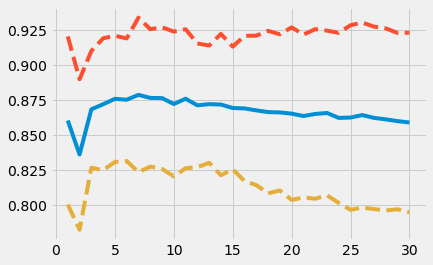

In [172]:
plt.plot(k_series,scores_series)
#plt.plot(k_series,scores_series_kf)
upper_bound = [1.96*std+mean for std, mean in zip(scores_std, scores_series)]
lower_bound = [-1.96*std+mean for std, mean in zip(scores_std, scores_series)]
plt.plot(k_series,upper_bound, '--')
plt.plot(k_series,lower_bound, '--')

In [139]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
X_embedded = tsne.fit_transform(beers_data)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3197 samples in 0.019s...
[t-SNE] Computed neighbors for 3197 samples in 0.288s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3197
[t-SNE] Computed conditional probabilities for sample 2000 / 3197
[t-SNE] Computed conditional probabilities for sample 3000 / 3197
[t-SNE] Computed conditional probabilities for sample 3197 / 3197
[t-SNE] Mean sigma: 7.084614
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.495857
[t-SNE] KL divergence after 300 iterations: 1.432598


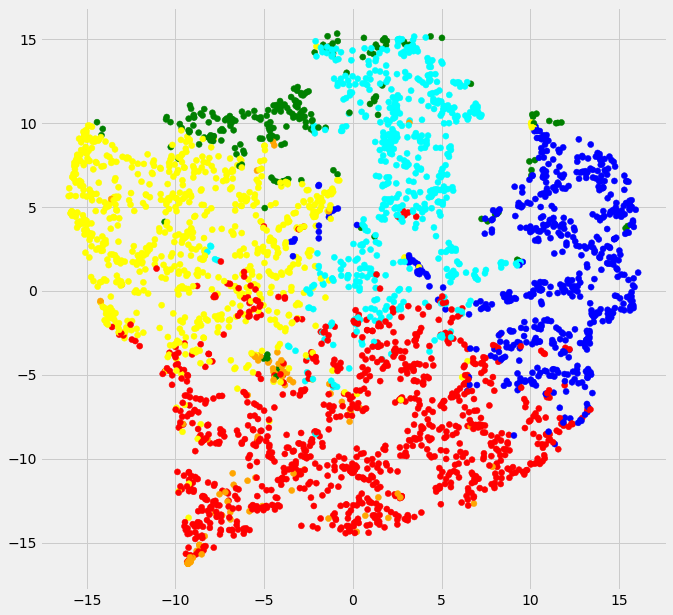

In [140]:
X_embedded
plt.figure(figsize=(10,10))
plt.scatter(
    x=X_embedded[:,0], y=X_embedded[:,1], c=beers_data['kmeans'], cmap=matplotlib.colors.ListedColormap(colors)
)